In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras import optimizers
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/Giso Lab/Documents/USC') # set the directory input files are in
df = pd.DataFrame(columns = [])
features = np.zeros(100)
targets = np.zeros((100,1089))
t=0
for i in glob.glob("velocity_*.csv"):
    features[t] = (t+1)*5
    tmp = np.loadtxt(i, delimiter=',', skiprows=1)
    targets[t,:] = tmp[:1089,1] # set [,1] for u and [,2] for w 
    t+=1

In [3]:
# check data
print("explain variables\n{}".format(features[:10]))
print("explained variables\n{}".format(targets[:10]))

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size=0.9)

# set model referring Zhou and Ooka (2020) but can try anything!
model = Sequential()
model.add(Dense(96, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(96, input_dim=96))
model.add(Activation('relu'))
model.add(Dense(1089, input_dim=96))
model.add(Activation('relu'))

rmsprop = optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0) # need to consider rho
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

# train
model.fit(x_train, y_train, epochs=50, batch_size=1)

# predict the labels of test data
pred = model.predict(x_test)
pred_list = pd.Series([np.argmax(value) for value in pred])
true_list = pd.Series([np.argmax(value) for value in y_test])
print(pd.DataFrame({'predict': pred_list,
                   'True_category': true_list}))

explain variables
[ 5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]
explained variables
[[5.2388e-05 1.2524e-04 1.2110e-04 ... 3.5379e-01 2.4829e-01 2.2143e-01]
 [3.1211e-05 1.4832e-04 3.6528e-04 ... 4.3742e-01 3.1983e-01 2.8099e-01]
 [3.7950e-05 1.2466e-03 4.0269e-03 ... 2.7507e-01 2.3591e-01 2.3323e-01]
 ...
 [3.3997e-05 1.7650e-04 4.5735e-04 ... 4.2964e-01 3.2009e-01 2.8423e-01]
 [3.8289e-05 1.8441e-04 4.6899e-04 ... 4.2727e-01 3.1940e-01 2.8422e-01]
 [4.3437e-05 1.9317e-04 4.8041e-04 ... 4.2477e-01 3.1856e-01 2.8406e-01]]


C:\Users\Giso Lab\miniconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
90/90 [==============================] - 36s 5ms/step - loss: -300.5854 - accuracy: 0.0499
Epoch 2/50
90/90 [==============================] - 0s 5ms/step - loss: -381.3363 - accuracy: 0.0648
Epoch 3/50
90/90 [==============================] - 0s 5ms/step - loss: -393.0344 - accuracy: 0.0807
Epoch 4/50
90/90 [==============================] - 0s 5ms/step - loss: -362.8804 - accuracy: 0.1963
Epoch 5/50
90/90 [==============================] - 1s 6ms/step - loss: -381.4085 - accuracy: 0.1426
Epoch 6/50
90/90 [==============================] - 1s 6ms/step - loss: -382.9254 - accuracy: 0.0941
Epoch 7/50
90/90 [==============================] - 1s 6ms/step - loss: -389.0530 - accuracy: 0.2537
Epoch 8/50
90/90 [==============================] - 1s 6ms/step - loss: -384.8390 - accuracy: 0.1073
Epoch 9/50
90/90 [==============================] - 1s 6ms/step - loss: -373.1035 - accuracy: 0.1223
Epoch 10/50
90/90 [==============================] - 1s 7ms/step - loss: -383.9864 - accur

In [4]:
# change the shape for visualization
CFD = y_test.reshape(10,33,33)
DNN = pred.reshape(10,33,33)

In [5]:
def draw_heatmap(data1,data2,Re):
    fig = plt.figure(figsize=(10.0, 5.0))

    ax1 = fig.add_subplot(1,2,1)
    heatmap = ax1.pcolor(data1, cmap='jet')
    ax1.set_title('DNN at Re: '+str(Re))
    ax1.set_xticklabels('X')
    ax1.set_yticklabels('Y')

    ax2 = fig.add_subplot(1,2,2)
    heatmap = ax2.pcolor(data2, cmap='jet')
    ax2.set_title('CFD at Re: '+str(Re))
    ax2.set_xticklabels('X')
    ax2.set_yticklabels('Y')
    
    plt.show()
    plt.savefig('img/image_'+str(Re)+'.png') # set img folder

    return heatmap

C:\Users\GISOLA~1\AppData\Local\Temp/ipykernel_13688/3545477933.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels('X')
C:\Users\GISOLA~1\AppData\Local\Temp/ipykernel_13688/3545477933.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels('Y')
C:\Users\GISOLA~1\AppData\Local\Temp/ipykernel_13688/3545477933.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels('X')
C:\Users\GISOLA~1\AppData\Local\Temp/ipykernel_13688/3545477933.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels('Y')
No handles with labels found to put in legend.


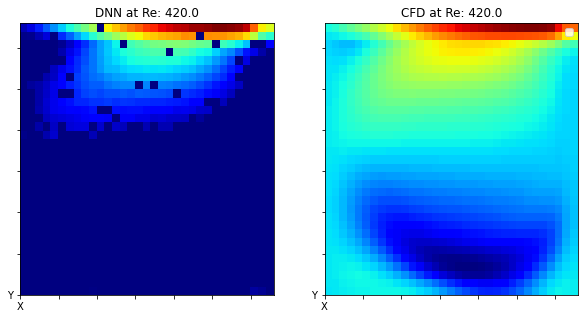

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

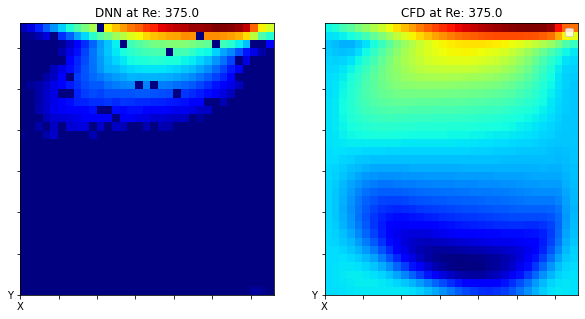

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

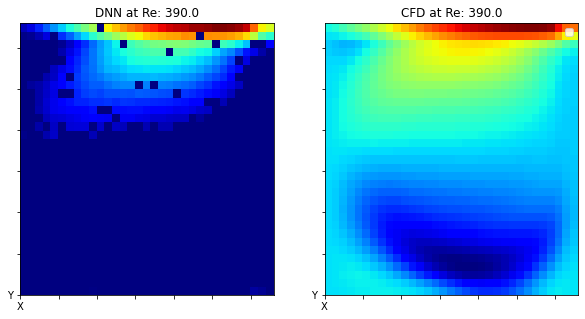

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

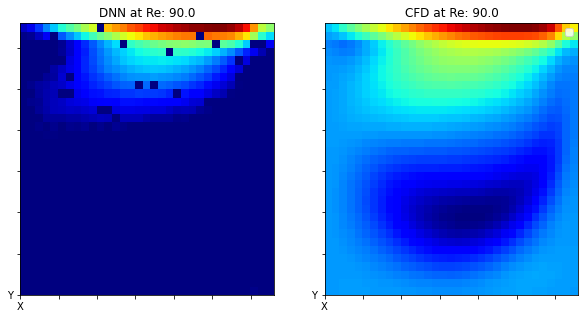

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

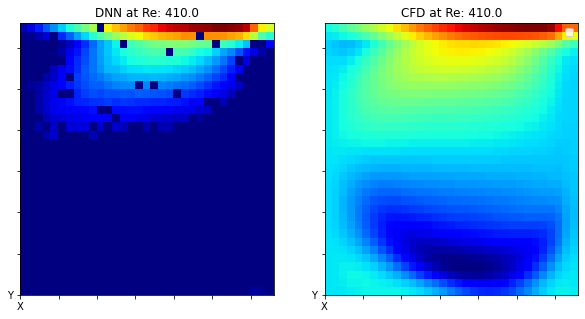

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

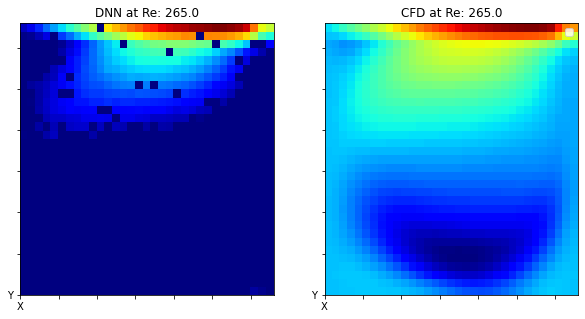

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

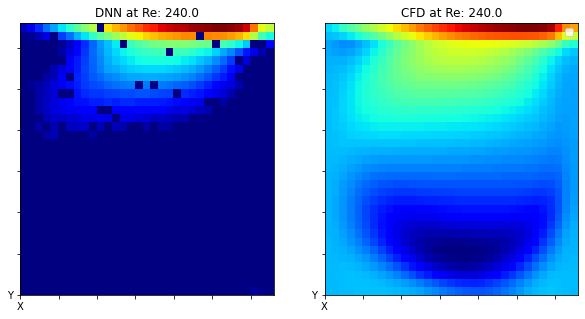

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

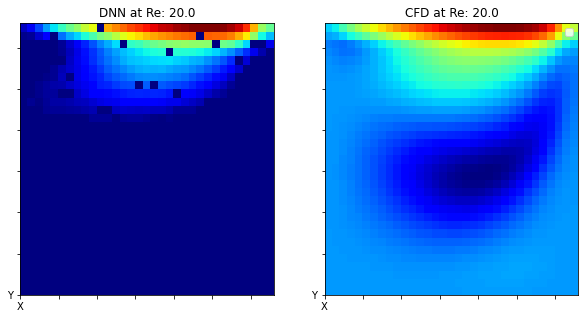

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

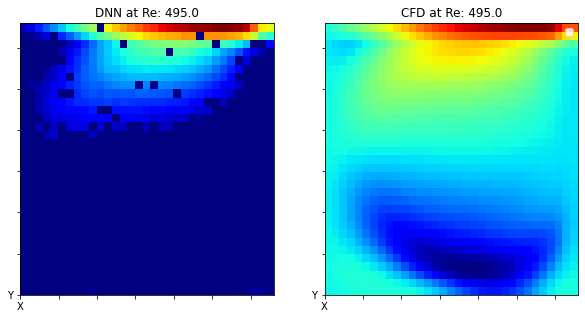

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

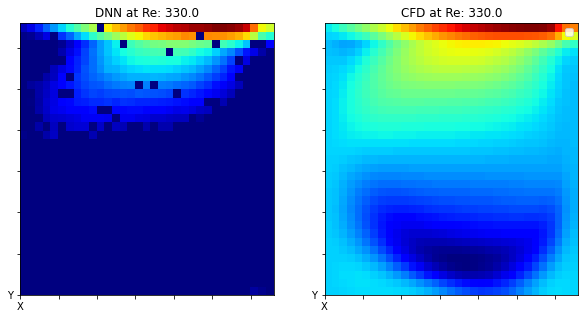

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(np.size(x_test)):
    draw_heatmap(DNN[i,:,:],CFD[i,:,:],x_test[i])